# Flipkart Smartphones Product Analysis

# Introduction

Understanding consumer preferences, market trends, and the factors influencing purchasing decisions is crucial in the dynamic environment of the smartphone industry. This data analysis project explores the vast dataset, which includes a wide range of smartphones from various brands and was gathered from Flipkart, one of India's top online marketplaces.

![Flipkart Banner](https://cdn.inc42.com/wp-content/uploads/2023/09/flipkart-featured-.png)

# Data Description

* brand: The brand of the smartphone, such as Samsung, Apple, Xiaomi, etc.
* model: The name and model number of the smartphone, such as iPhone 12, Samsung Galaxy A33, Redmi Note 10, etc.
* colour: The colour of the smartphone, such as sandy gold, sunrise blue, etc.
* original_price: The original price of the smartphone in Indian rupees (INR) before any discounts.
* discounted_price: The discounted price of the smartphone in INR after any discounts or promotions.
* ratings: The average rating of the smartphone by customers on the Flipkart website, on a scale of 1 to 5 stars.
* rating count: The number of ratings given by customers on the Flipkart website for the smartphone.
* reviews: The text reviews given by customers on the Flipkart website for the smartphone.
* memory: The amount of RAM memory included in the smartphone measured in gigabytes (GB).
* storage: The amount of internal storage included in the smartphone measured in gigabytes (GB).
* processor: The type and speed of the processor included in the smartphone, such as Qualcomm Snapdragon 888, Apple A14 Bionic, etc.
* rear_camera: The number and specifications of the rear cameras included in the smartphone, such as 48 MP + 12 MP + 5 MP, etc.
* front_camera: The number and specifications of the front camera included in the smartphone, such as 20 MP, etc.
* display_size: The diagonal size of the smartphone screen measured in centimeters (cm).
* battery_capacity: The capacity of the smartphone battery measured in milliampere-hours (mAh).

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/flipkart-smartphones-dataset/flipkart_smartphones.csv") #Reading the file

In [3]:
df.head()

,brand,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,processor,rear_camera,front_camera,display_size,battery_capacity,battery_type
0,VIVO,VIVO T1 44W,Starry Sky,19990,14499,4.5,87331,6044,4.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium
1,APPLE,APPLE IPHONE 11,White,48900,47199,4.6,184191,10818,NaN,128.0,A Bionic Chip,12MP + 12MP,12MP,15.49,NaN,NaN
2,VIVO,VIVO T1 44W,Midnight Galaxy,20990,15999,4.4,51365,3750,6.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0,Lithium
3,XIAOMI,POCO M4 5G,Power Black,15999,11999,4.2,53448,4185,4.0,64.0,Mediatek Dimensity 700,50MP + 2MP,8MP,16.71,5000.0,Lithium Polymer
4,XIAOMI,REDMI 10,Caribbean Green,14999,9299,4.3,187787,12084,4.0,64.0,Qualcomm Snapdragon 680,50MP + 2MP,5MP,17.02,6000.0,Lithium Polymer


In [4]:
df.shape

(836, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             836 non-null    object 
 1   model             836 non-null    object 
 2   colour            831 non-null    object 
 3   original_price    836 non-null    int64  
 4   discounted_price  836 non-null    int64  
 5   ratings           836 non-null    float64
 6   rating_count      836 non-null    int64  
 7   reviews           836 non-null    int64  
 8   memory            757 non-null    float64
 9   storage           820 non-null    float64
 10  processor         698 non-null    object 
 11  rear_camera       836 non-null    object 
 12  front_camera      707 non-null    object 
 13  display_size      836 non-null    float64
 14  battery_capacity  778 non-null    float64
 15  battery_type      477 non-null    object 
dtypes: float64(5), int64(4), object(7)
memory us

In [6]:
df.isnull().sum()  #Checking Null Values

brand                 0
model                 0
colour                5
original_price        0
discounted_price      0
ratings               0
rating_count          0
reviews               0
memory               79
storage              16
processor           138
rear_camera           0
front_camera        129
display_size          0
battery_capacity     58
battery_type        359
dtype: int64

In [7]:
df.duplicated().sum() #Checking duplicates

2

In [8]:
df.drop_duplicates(inplace = True) #Dropping Duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 835
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             834 non-null    object 
 1   model             834 non-null    object 
 2   colour            829 non-null    object 
 3   original_price    834 non-null    int64  
 4   discounted_price  834 non-null    int64  
 5   ratings           834 non-null    float64
 6   rating_count      834 non-null    int64  
 7   reviews           834 non-null    int64  
 8   memory            756 non-null    float64
 9   storage           819 non-null    float64
 10  processor         697 non-null    object 
 11  rear_camera       834 non-null    object 
 12  front_camera      706 non-null    object 
 13  display_size      834 non-null    float64
 14  battery_capacity  776 non-null    float64
 15  battery_type      476 non-null    object 
dtypes: float64(5), int64(4), object(7)
memory usage: 

In [9]:
#Dropping Unnecessary column
df = df.drop(['battery_type'], axis = 1)  
df.head()

,brand,model,colour,original_price,discounted_price,ratings,rating_count,reviews,memory,storage,processor,rear_camera,front_camera,display_size,battery_capacity
0,VIVO,VIVO T1 44W,Starry Sky,19990,14499,4.5,87331,6044,4.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0
1,APPLE,APPLE IPHONE 11,White,48900,47199,4.6,184191,10818,NaN,128.0,A Bionic Chip,12MP + 12MP,12MP,15.49,NaN
2,VIVO,VIVO T1 44W,Midnight Galaxy,20990,15999,4.4,51365,3750,6.0,128.0,Qualcomm Snapdragon 680,50MP + 2MP + 2MP,16MP,16.36,5000.0
3,XIAOMI,POCO M4 5G,Power Black,15999,11999,4.2,53448,4185,4.0,64.0,Mediatek Dimensity 700,50MP + 2MP,8MP,16.71,5000.0
4,XIAOMI,REDMI 10,Caribbean Green,14999,9299,4.3,187787,12084,4.0,64.0,Qualcomm Snapdragon 680,50MP + 2MP,5MP,17.02,6000.0


In [10]:
df.isnull().sum()  #Checking Null Values after dropping a column

brand                 0
model                 0
colour                5
original_price        0
discounted_price      0
ratings               0
rating_count          0
reviews               0
memory               78
storage              15
processor           137
rear_camera           0
front_camera        128
display_size          0
battery_capacity     58
dtype: int64

# **Data Cleaning**

# Cleaning Individual Attribute

In [11]:
df['battery_capacity'].fillna(0, inplace=True) #filling null values with 0

In [12]:
df['processor'].fillna("-", inplace=True) #filling null values with -

In [13]:
df['front_camera'].fillna('0 MP', inplace=True) #filling null values with 0 MP phone might come without front camera

In [14]:
stor_mode = df['storage'].mode()
df['storage'].fillna(float(stor_mode), inplace=True) 
#filling null values with mode ie 128 usually phone storage comes in 64GB , 128GB or 256GB in that case filling with mode makes more sense

In [15]:
memory_mode = df['memory'].mode()
df['memory'].fillna(float(memory_mode), inplace=True)
#filling null values with mode ie 4 usually phone memory(RAM) comes in 1GB, 2GB, 3GB, 4GB, 6GB  or 8GB in that case filling with mode makes more sense

In [16]:
df['colour'].fillna("-", inplace=True) #filling null values with -

In [17]:
df.rename(columns = {"memory":"ram"}, inplace = True) #renaming memory to ram 

In [18]:
df['processor'] = df['processor'].str.upper() 
#changing the text to uppercase text in order to avoid confusion when using functions like groupby, unique

In [19]:
df.isnull().sum()  #Checking Null Values after cleaning the data

brand               0
model               0
colour              0
original_price      0
discounted_price    0
ratings             0
rating_count        0
reviews             0
ram                 0
storage             0
processor           0
rear_camera         0
front_camera        0
display_size        0
battery_capacity    0
dtype: int64

**Adding a Price Segment**

This price range is based on 'original_price' because there might be a sale or any promotions going on for specific period of time which will affect discounted_price this should not impact segmentation 

* Budget Segment: Price Range: Up to INR 15,000
* Mid-Range Segment: Price Range: INR 15,000 to INR 30,000
* Upper Mid-Range Segment: Price Range: INR 30,000 to INR 50,000
* Flagship Segment:Price Range: INR 50,000 and above

In [20]:
#Adding price segment column 

def categorize_price_segment(price):
    if price <= 15000:
        return 'Budget Segment'
    elif price <= 30000:
        return 'Mid-Range Segment'
    elif price <= 50000:
        return 'Upper Mid-Range Segment'
    else:
        return 'Flagship Segment'


df['price_segment'] = df['original_price'].apply(categorize_price_segment)

# Data Visualization


# Number of Models by Brands

In [21]:
brand_model = df.groupby("brand")["model"].nunique().to_frame().sort_values(by = "model", ascending = False).reset_index()
brand_model
#creating a dataframe with brand names and total number of models

,brand,model
0,XIAOMI,61
1,REALME,42
2,SAMSUNG,37
3,OPPO,29
4,VIVO,27
5,INFINIX,25
6,MOTOROLA,24
7,TECNO,15
8,ITEL,9
9,APPLE,9


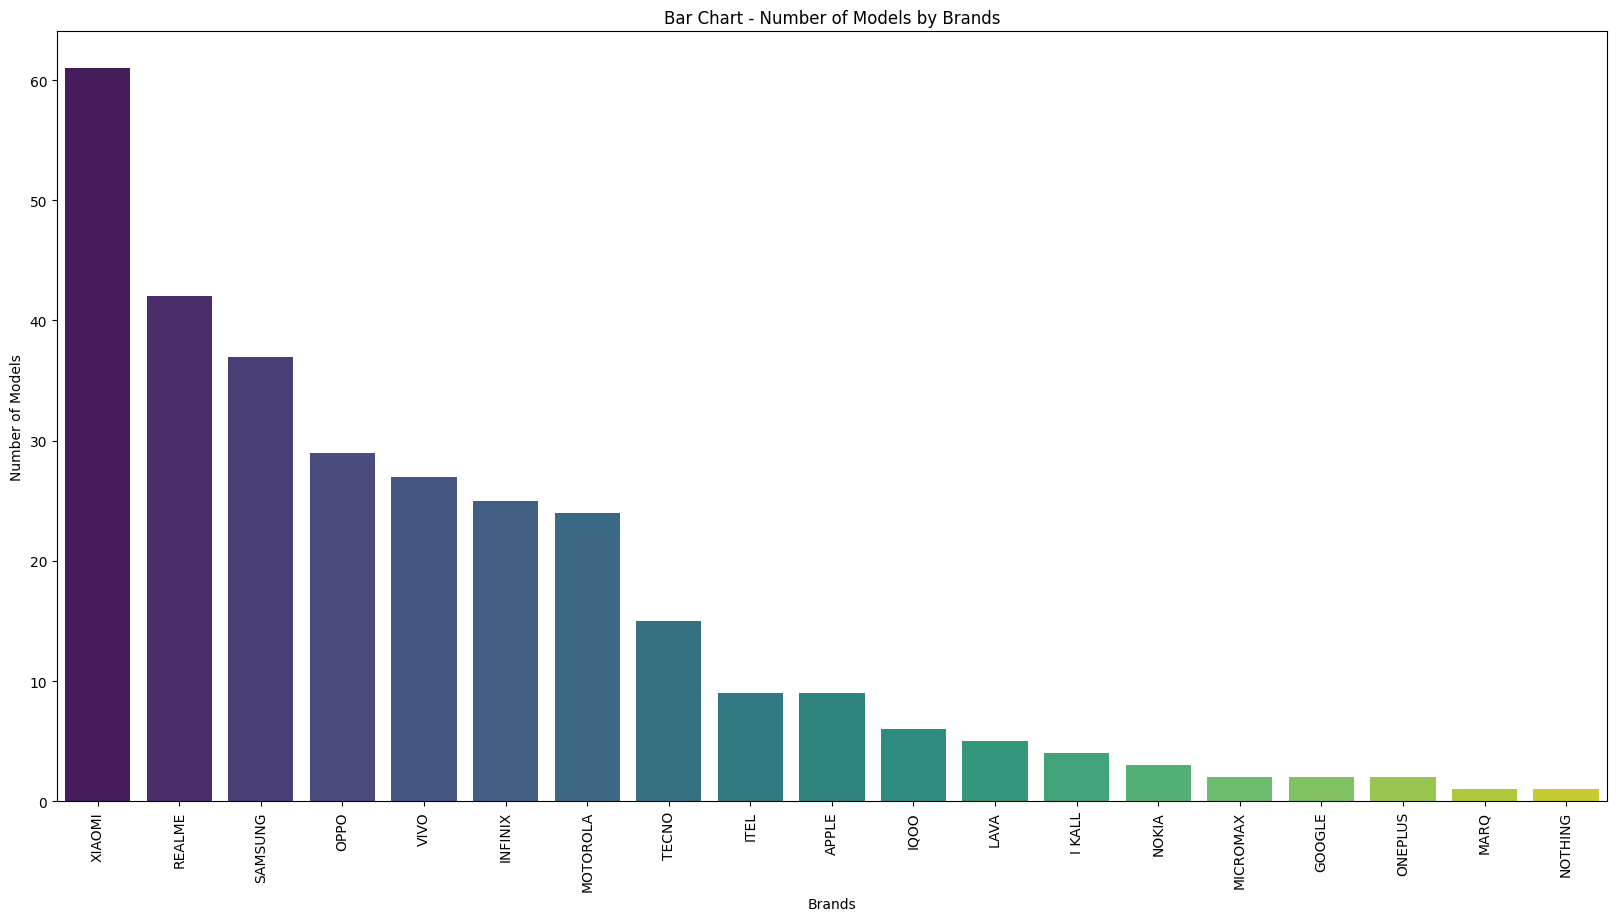

In [22]:
plt.figure(figsize=(20, 10))
sns.barplot(data = brand_model, x= "brand", y= "model" ,palette='viridis')
plt.xticks(rotation = "vertical")
plt.title('Bar Chart - Number of Models by Brands')
plt.xlabel('Brands')
plt.ylabel('Number of Models')
plt.show()


**Observations**

Xiaomi leads with the highest number of smartphone models, followed by Realme in the second position, and Samsung securing the third position. This observation highlights the diverse product portfolios of these brands in the Flipkart smartphone market.

# Average rating by Brands

In [23]:
Avg_rate = df.groupby("brand").agg({"ratings":"mean"}).sort_values(by = "ratings", ascending = False).reset_index()
Avg_rate
#Creating a dataframe that has brand names and their Average ratings

,brand,ratings
0,APPLE,4.662069
1,REALME,4.363889
2,GOOGLE,4.350000
3,VIVO,4.347619
4,NOTHING,4.300000
5,ONEPLUS,4.277778
6,XIAOMI,4.252514
7,OPPO,4.248214
8,INFINIX,4.242254
9,IQOO,4.241176


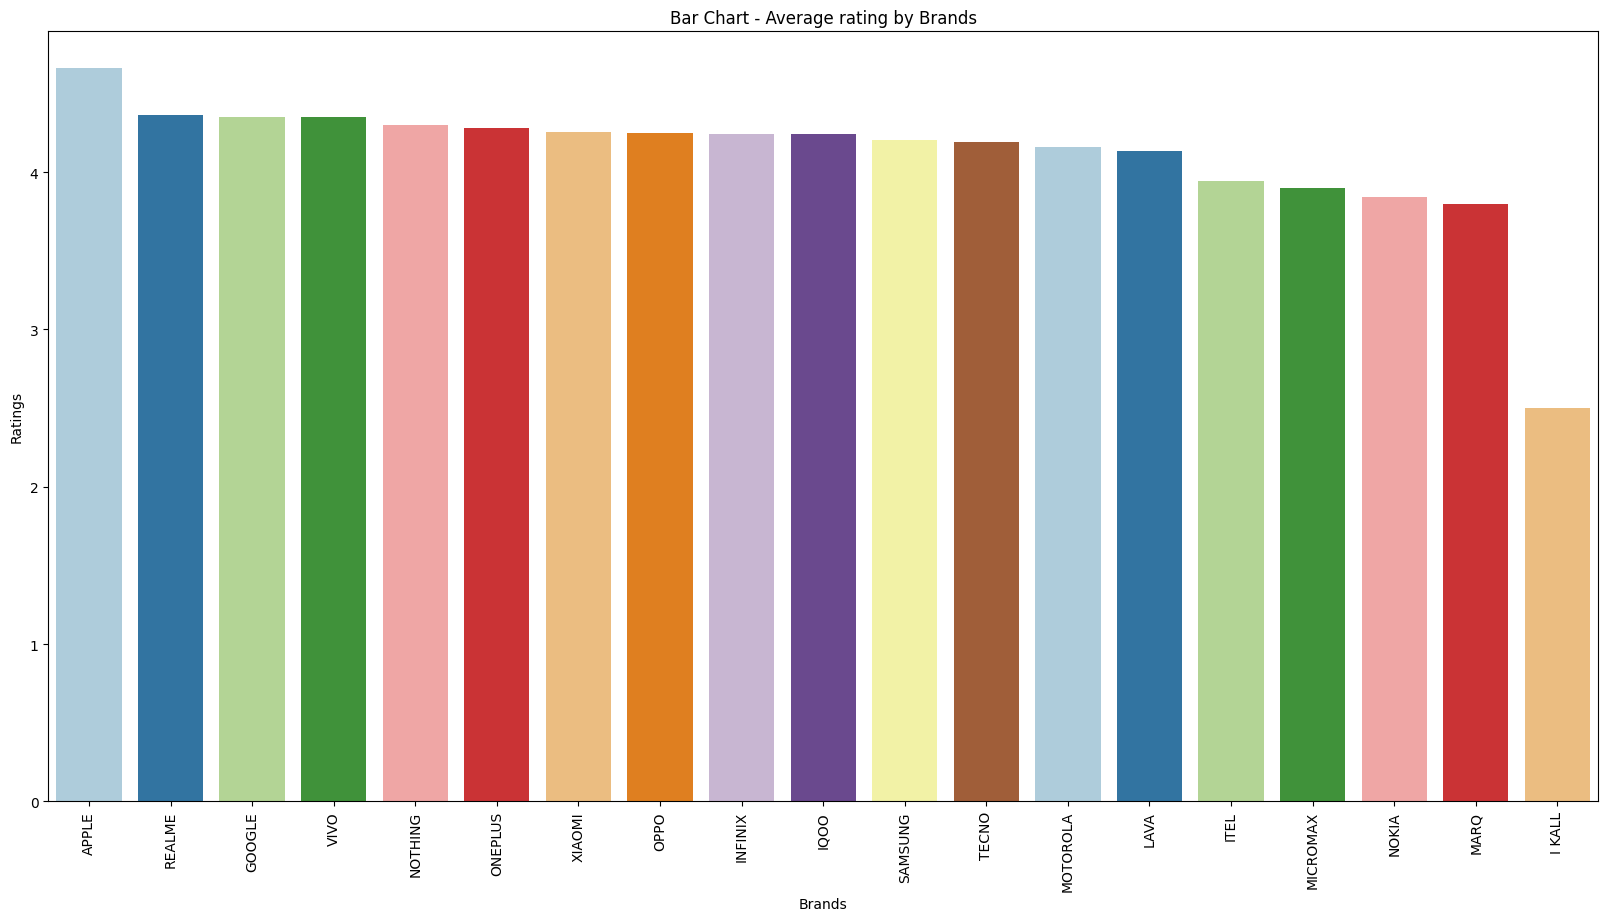

In [24]:
plt.figure(figsize=(20, 10))
sns.barplot(data = Avg_rate, x= "brand", y = "ratings",palette='Paired')
plt.xticks(rotation = "vertical")
plt.title('Bar Chart - Average rating by Brands')
plt.xlabel('Brands')
plt.ylabel('Ratings')
plt.show()


**Observations**

With an impressive average rating of 4.66, Apple is in first place. With an average rating of 4.36, Realme closely trails in second place, followed by Google, which comes in third with a 4.35 rating.

# Rating Distribution by Brand

In [25]:
fig1 = px.box(df, x='brand', y='ratings', title='Box Plot: Rating Distribution by Brand', color = 'brand', height = 800)
fig1.update_layout(xaxis_title='Brands', yaxis_title='Rating')
fig1.show()

**Observations**

* Apple brand smartphone have great ratings with minimum rating of 4.5 is pretty good rating for smartphones
* Most of the smartphone brands have rating above 4.0 except one or two this shows customers are satistfied with their smartphones and brands also providing their best to satisfy their customers
* Ikall brand has to concentrate on their smartphone stability and features clearly customers are not satisfied
* Realme, Google and Vivo have good satisfaction rate



# Top & Bottom 10 Smartphones by Rating

In [26]:
top_model = df.groupby("model").agg({"ratings":"mean"}).sort_values(by = "ratings", ascending = False).reset_index()[0:10]
top_model

#Creating a dataframe that has Top 10 Smartphones by rating

,model,ratings
0,VIVO Y56 5G,4.7
1,APPLE IPHONE 14 PRO MAX,4.7
2,APPLE IPHONE 13,4.7
3,SAMSUNG GALAXY S23 5G,4.7
4,APPLE IPHONE 14,4.7
5,APPLE IPHONE 14 PLUS,4.7
6,APPLE IPHONE 14 PRO,4.7
7,APPLE IPHONE 12,4.6
8,APPLE IPHONE 11,4.6
9,APPLE IPHONE 13 PRO,4.6


In [27]:
bottom_model = df.groupby("model").agg({"ratings":"mean"}).sort_values(by = "ratings", ascending = True).reset_index()[0:10]
bottom_model

#Creating a dataframe that has Bottom 10 Smartphones by rating

,model,ratings
0,OPPO A 78 5G,0.0
1,I KALL Z20 PRO,0.0
2,ITEL VISION3 TURBO,3.0
3,I KALL Z5,3.0
4,MICROMAX BHARAT 2 PLUS,3.3
5,I KALL Z19PRO,3.4
6,ITEL A23S,3.5
7,SAMSUNG GALAXY S23 ULTRA 5G,3.6
8,SAMSUNG GALAXY M53 5G,3.6
9,I KALL 401 PRO DARK BLUE,3.6


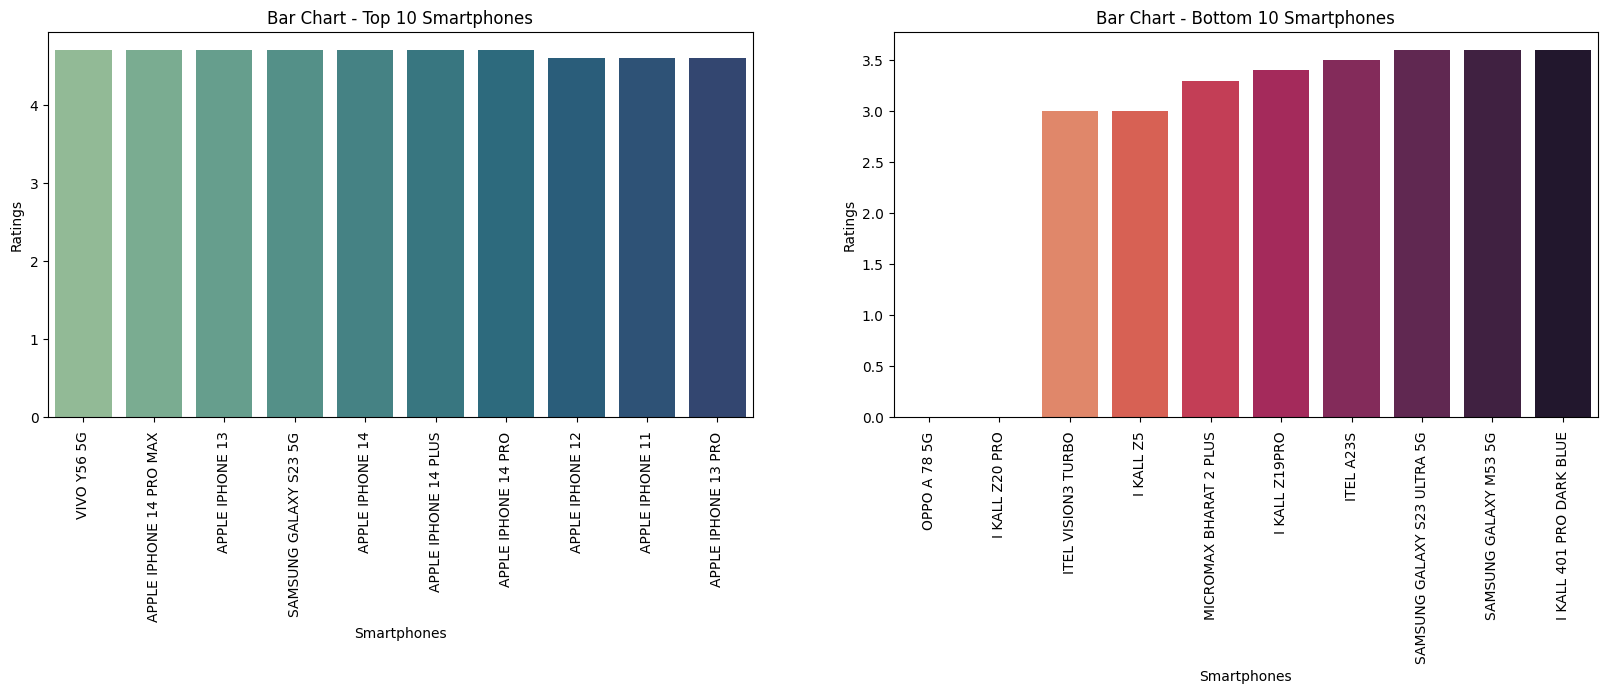

In [28]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.barplot(data = top_model, x= "model", y = "ratings",palette='crest')
plt.title('Bar Chart - Top 10 Smartphones')
plt.xlabel('Smartphones')
plt.ylabel('Ratings')
plt.xticks(rotation = "vertical")

plt.subplot(1,2,2)

sns.barplot(data = bottom_model, x= "model", y = "ratings",palette='rocket_r')
plt.title('Bar Chart - Bottom 10 Smartphones')
plt.xlabel('Smartphones')
plt.ylabel('Ratings')
plt.xticks(rotation = "vertical")

plt.show()

**Observations**

* Apple smartphones are dominating the top 10 smartphone list 8 out of 10 smartphones are Apple smartphones
* SAMSUNG GALAXY S23 5G and VIVO Y56 5G also have 4.7 rating
* When comes to bottom 10 list we have OPPO A 78 5G and I KALL Z20 PRO it has 0.0 rating, users cannot rate 0 for a smartphone so those smartphones should be new at the time of data collection 
* Most of the smartphones brands in the bottom list are new brands it is interesting to see 2 smartphones from Samsung



# Rating Distribution by Price Segment

In [29]:
#Creating a dataframe for each segment

budget = df[df["price_segment"] == "Budget Segment"]
midrange = df[df["price_segment"] == "Mid-Range Segment"]
uppermidrange = df[df["price_segment"] == "Upper Mid-Range Segment"]
flagship = df[df["price_segment"] == "Flagship Segment"]

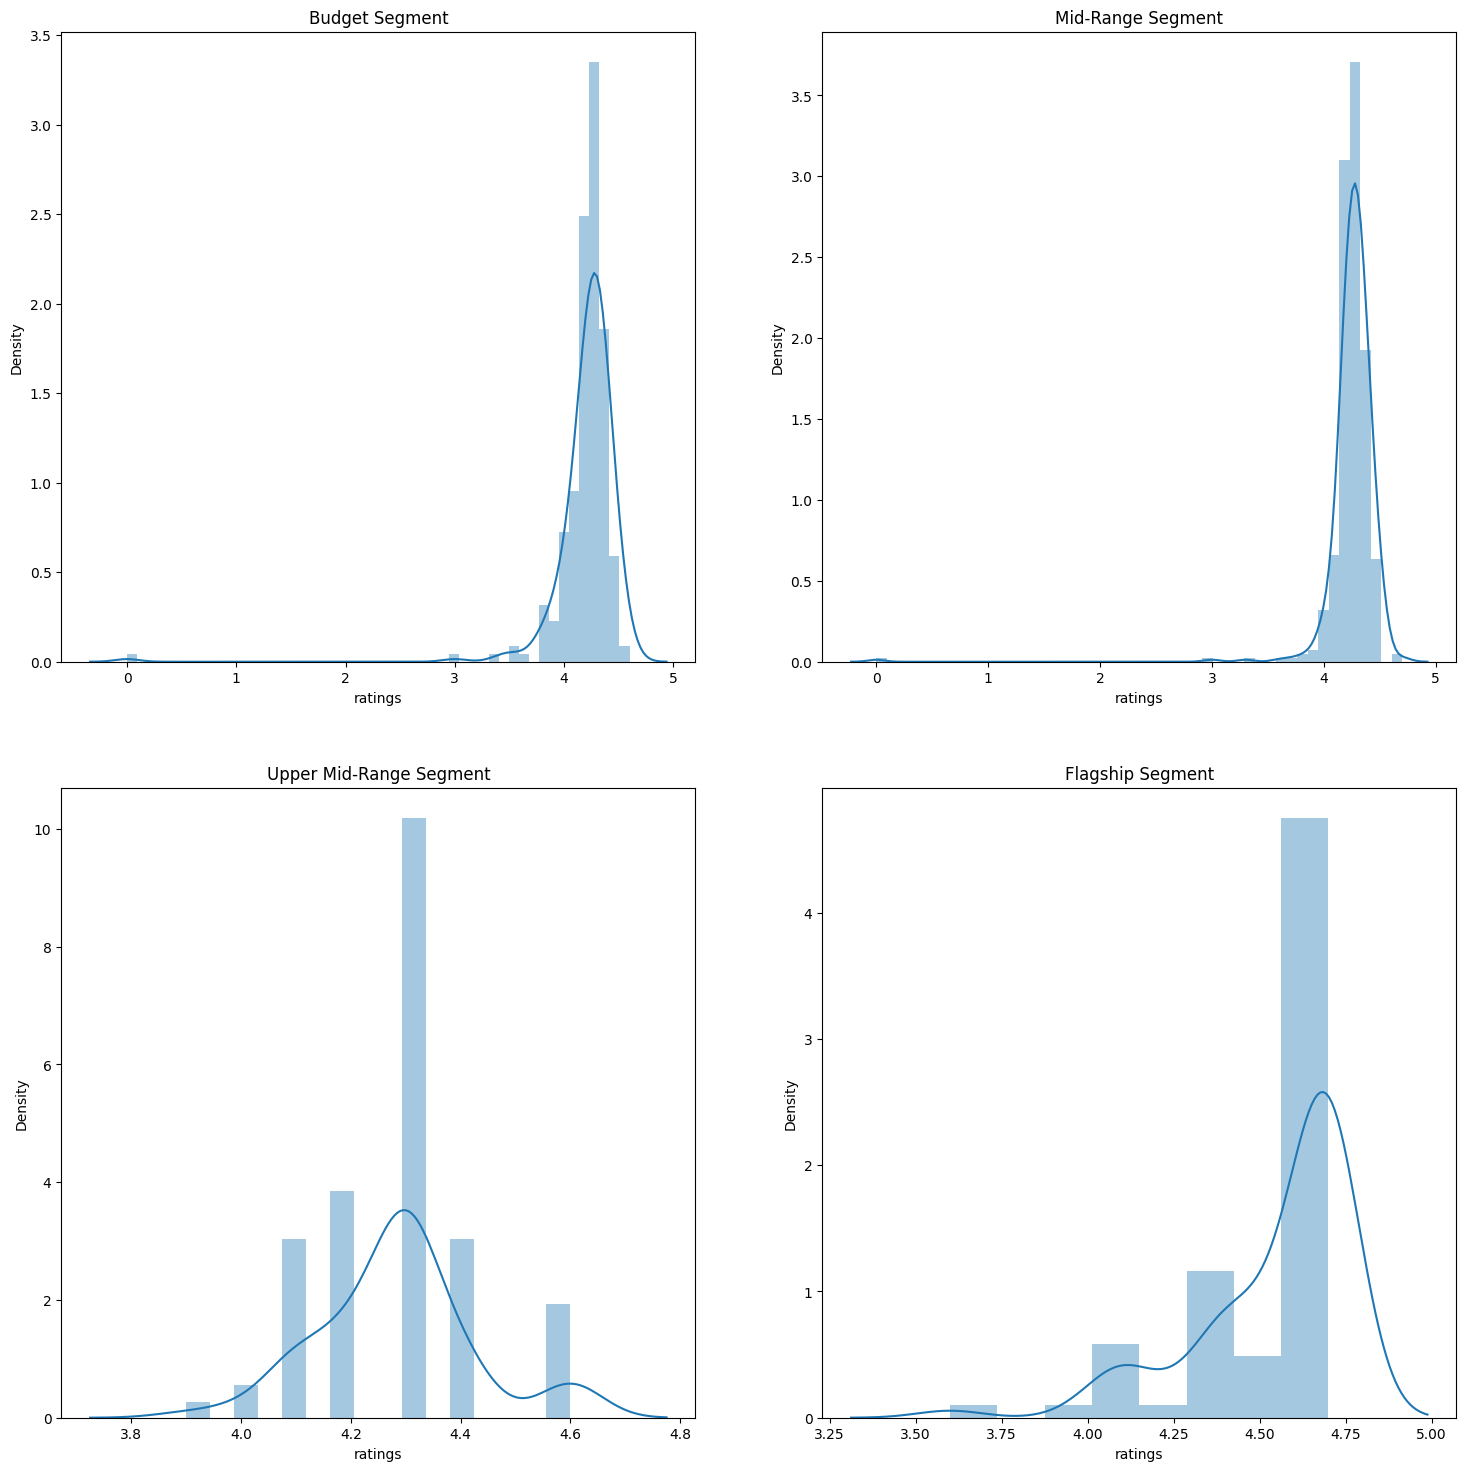

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))

sns.distplot(budget['ratings'], ax=axs[0, 0])
sns.distplot(midrange['ratings'], ax=axs[0, 1])
sns.distplot(uppermidrange['ratings'], ax=axs[1, 0])
sns.distplot(flagship['ratings'], ax=axs[1, 1])

axs[0, 0].set(title='Budget Segment')
axs[0, 1].set(title='Mid-Range Segment')
axs[1, 0].set(title='Upper Mid-Range Segment' )
axs[1, 1].set(title='Flagship Segment')

plt.show()

**Budget Segment:**
* Ratings Mostly between 4.2 and 4.3.
* Average Around 4.21.

**Mid-Range Segment:**
* Ratings Vary a bit, mostly between 4.2 and 4.3.
* Average Around 4.26.

**Upper Mid-Range Segment**
* Ratings Consistently between 4.2 and 4.3.
* Average Around 4.28.

**Flagship Segment:**
* Ratings Consistently between 4.4 and 4.7.
* Average Around 4.55.

# Rear Camera vs Front Camera

In [31]:
fig = px.scatter(df, x='rear_camera', y='front_camera', title='Rear Camera vs Front Camera')
fig.show()

**Observations**

* Most smartphones comes with the multiple cameras in the back and have 50MP sensor in the back and 16MP or 8MP front camera
* Dual front cameras only exsist in few smartphones

# Top 10 Processor Used by Smartphones

In [32]:
processor = df.groupby("processor")["model"].nunique().to_frame().sort_values(by = "model", ascending = False).reset_index()
processor

#Creating a dataframe that has Top 10 Processor Used by Smartphones

,processor,model
0,-,61
1,MEDIATEK HELIO G35,15
2,QUALCOMM SNAPDRAGON 680,14
3,MEDIATEK HELIO P35,13
4,OCTA CORE,6
...,...,...
115,MEDIATEK HELIO P35 OCTA CORE,1
116,MEDIATEK HELIO G99 OCTA CORE,1
117,MEDIATEK HELIO G95 OCTA CORE,1
118,"MEDIATEK HELIO A22, UPTO 2.0 GHZ",1


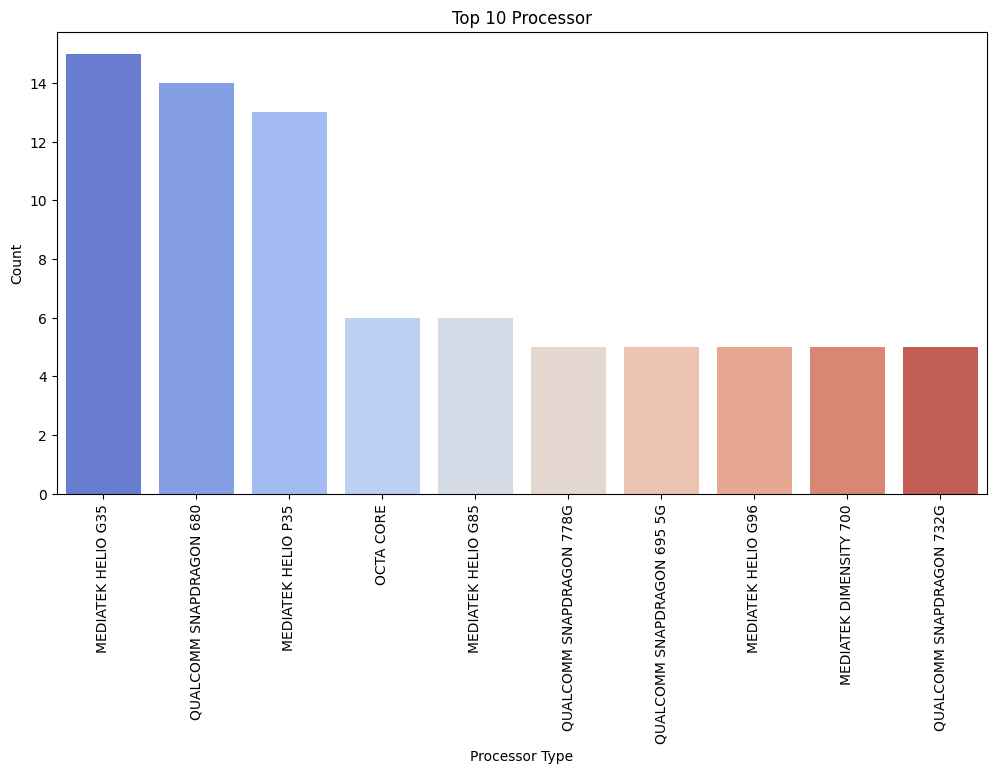

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='processor', y = "model", data=processor[1:11], palette = "coolwarm" )
plt.title('Top 10 Processor')
plt.xlabel('Processor Type')
plt.ylabel('Count')
plt.xticks(rotation="vertical")
plt.show()

**Observations**

From the above plot we can clearly see the smartphone processor are dominated by Mediatek and Qualcomm processors
MEDIATEK HELIO G35 holds the first place stating more smartphones use this processor



# Memory vs Storage

In [34]:
fig = px.scatter(df, x='ram', y='storage', title='Memory vs Storage', color = "storage")
fig.show()

**Observations**

* 128GB storage is widely available with 2GB, 4GB, 6GB and 8GB RAM variants
* Followed by 64GB storage is available with 2GB, 4GB, 6GB RAM variants
* 2GB RAM Smartphones comes with wide range of storage ranging from 16GB to 128GB


# Relationship Among Battery Capacity, Storage, and RAM

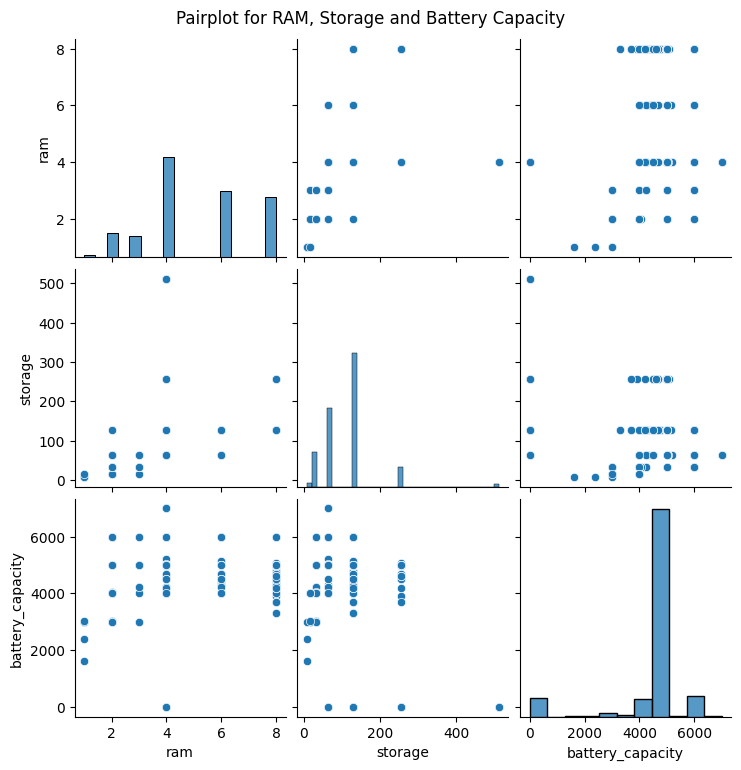

In [35]:
sns.pairplot(df[['ram', 'storage', 'battery_capacity']])
plt.suptitle('Pairplot for RAM, Storage and Battery Capacity', y=1.02)
plt.show()

**Observations**

* Most phones have 4GB RAM 
* Popular choice when it comes to storage is 128GB 
* Wide range of phones comes with 5000MAH battery capacity 
* Lesser Ram phones tend to have less battery capacity higher ram phones have higher battery capacity


# Comparison of Battery Capacities by Brand

In [36]:
fig = px.box(df, x='brand', y='battery_capacity', title='Comparison of Battery Capacities by Brand', height = 1000, color = "brand")
fig.show()

**Observations**

* From the above plot it is clear that Apple tends to hide their battery capacity
* Most brand focus on the 5000MAH battery capacity
* At max most brands are ready to go upto 6000MAH battery
* Samsung is producing more smartphones with capacity between 5000MAH to 6000MAH
* Majority of the brands does not have phones under 4000MAH battery this means todays smartphones atleast need 4000MAh battery capacity to survive a day of usage

# Distribution of Display Sizes

In [37]:
fig = px.histogram(df, x='display_size', title='Distribution of Display Sizes',color= "display_size")
fig.show()

**Observations**

* Popular screen size is 16.76cm (6.59 inches) followed by 16.51cm (6.5 inches) basically plot shows the famous screen sizes are 6.5 inches and 6.6 inches
* Majority of the screen size lies between 6.4 inches to 6.72 inches
* Compact phone lovers go for the 6.0 inches

# Conclusions

**Models by Brands in Number**

* Xiaomi, Realme, and Samsung have a significant presence, indicating a wide range of smartphone options in the market.
* This diversity suggests a cutthroat environment where brands compete to satisfy different consumer preferences.

**Average Brand Rating**

* With the highest average rating, Apple stands out, demonstrating the company's dedication to quality and customer satisfaction.
* Realme and Google closely follow, indicating a cutthroat market where many brands are selling well-liked smartphones.

**Distribution based on brand:**

* Apple consistently keeps high ratings, demonstrating a high level of customer satisfaction.
* Most brands have ratings higher than 4.0, which shows that the market as a whole is satisfied.
* Ikall and other companies with lower ratings may need to address customer concerns and raise product quality.
 
**Top & Bottom 10 Smartphones by Rating:**

* The fact that Apple dominates the top-rated smartphones is a testament to the company's reputation for excellence.
* The bottom list includes some newer brands that point to potential areas for improvement.

**Distribution of ratings by price segment:**

* Flagship smartphones consistently receive higher ratings, which is consistent with the relationship between price and customer satisfaction.
* Positive reviews for budget and mid-range smartphones also indicate that customers find value in these categories.

**Front Camera vs. Rear Camera:**

* The majority of smartphones come equipped with multiple rear cameras, a common 50MP sensor, and a standard 16MP or 8MP front camera.
* Dual front cameras are less common. Brands prioritize rear camera configurations

**The Top 10 Processors for Smartphones:**

* The market is dominated by Mediatek and Qualcomm processors, with MEDIATEK HELIO G35 being the most popular.

**Storage vs. Memory:**

* Phones frequently come with 128GB of storage and a range of RAM options.
* 2GB RAM phones have a wide range of storage options, reflecting entry- level smartphones.

**Relationship Among Battery Capacity, Storage, and RAM:**

* The majority of phones have 4GB RAM, 128GB of storage, and a 5000mAh battery.
* Higher RAM phones tend to have larger battery capacities, offering a balance between performance and battery life.

**Battery Capacity Comparison by Brand:**

* Apple frequently keeps its battery capacity a secret.
* Most brands focus on the 5000mAh range, with Samsung producing more phones in the 5000- 6000mAh range.
* Brands generally avoid phones with batteries under 4000mAh, indicating a market preference for longer battery life.

**Distribution of Display Sizes:**

* The most popular screen sizes are around 6.5 to 6.6 inches, with 6.59 inches being the most common.
* Majority of phones fall in the 6.4 to 6.72 inches range, catering to users who prefer larger displays.
* Compact phones with 6.0-inch screens also have a niche market.